In [21]:
import numpy as np
import time
import matplotlib.pyplot as plt

class Perceptron:
    """Clasificador Perceptron basado en la descripción del libro
    "Python Machine Learning" de Sebastian Raschka.

    Parametros
    ----------

    eta: float
        Tasa de aprendizaje.
    n_iter: int
        Pasadas sobre el dataset.

    Atributos
    ---------
    w_: array-1d
        Pesos actualizados después del ajuste
    errors_: list
        Cantidad de errores de clasificación en cada pasada

    """
    def __init__(self, eta=0.1, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Ajustar datos de entrenamiento

        Parámetros
        ----------
        X:  array like, forma = [n_samples, n_features]
            Vectores de entrenamiento donde n_samples es el número de muestras y
            n_features es el número de carácteristicas de cada muestra.
        y:  array-like, forma = [n_samples].
            Valores de destino

        Returns
        -------
        self:   object
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def predict(self, X):
        """Devolver clase usando función escalón de Heaviside.
        phi(z) = 1 si z >= theta; -1 en otro caso
        """
        phi = np.where(self.net_input(X) >= 0.0, 1, -1)
        return phi

    def net_input(self, X):
        """Calcular el valor z (net input)"""
        # z = w · x + theta
        z = np.dot(X, self.w_[1:]) + self.w_[0]
        return z

In [22]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[0],[0],[1]])


In [23]:
ppn = Perceptron(eta=0.1, n_iter=10)

In [24]:
ppn.fit(X,y)

&lt;__main__.Perceptron at 0x2af8b7eb148&gt;

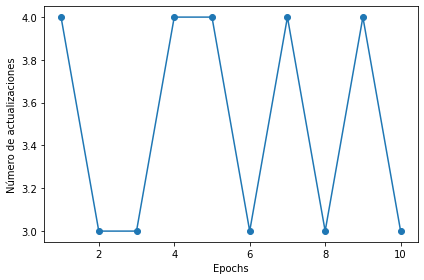

In [25]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Número de actualizaciones')

plt.tight_layout()
#plt.savefig('../images/perceptron_1.png', dpi=300)
plt.show()

In [28]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 0],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

In [29]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('../images/perceptron_2.png', dpi=300)
plt.show()

IndexError: too many indices for array